In [1]:
from tqdm import tqdm
import time
import os
import csv
import sqlite3
import numpy as np
import matplotlib.pyplot  as plt
import random
from collections import defaultdict
import pandas as pd
from igraph import *
import matplotlib.pyplot as plt
import enchant
import numpy as np
import networkx as nx

In [2]:
data = pd.read_pickle("/home/dsi/avitalab/combinedDB/seqCountCombinedDBLen.pkl")

In [3]:
data.head()

,amino_acid,counts,Length
0,CASSLGETQYF,2843,11
1,CASSLGYEQYF,2751,11
2,CASSLGGNTEAFF,2700,13
3,CASSLQETQYF,2679,11
4,CASSLGGTEAFF,2658,12


In [16]:
# private = unpickled_df[unpickled_df['counts'] == 1]
# public = unpickled_df[unpickled_df['counts'] != 1]

In [4]:
# Shuffle seq that have the same count
groups = [df for _, df in data.groupby('counts')]
for i in range(len(groups)):
          groups[i] = groups[i].sample(frac=1).reset_index(drop=True)
data = pd.concat(groups).reset_index(drop=True)
data = data.sort_values(by=['counts'], ascending=False)

In [5]:
data

,amino_acid,counts,Length
181110962,CASSLGETQYF,2843,11
181110961,CASSLGYEQYF,2751,11
181110960,CASSLGGNTEAFF,2700,13
181110959,CASSLQETQYF,2679,11
181110958,CASSLGGTEAFF,2658,12
...,...,...,...
60370323,CSVEGGHLPYEQYF,1,14
60370324,CASRSGTTGVAFF,1,13
60370325,CAWNRYRAVTGELFF,1,15
60370326,CASSYLPPAGGAGELFF,1,17


In [6]:
edgeCounter = []
singletonCounter = []
clustersCounter = []
publicness = []
for i in tqdm(range(0,12800,50)):
          elistRand = []
          df = data.iloc[i:i+50]
          rand50 = df["amino_acid"].reset_index(drop=True)
          for i in tqdm(range(50)):
                    for j in range(50):
                              if 1 <= (enchant.utils.levenshtein(rand50[i], rand50[j])) <= 1:
                                        elistRand.append((i,j))
          lst = list(range(0,50))
          G = nx.Graph()
          G.add_nodes_from(lst)
          G.add_edges_from(elistRand)
          publicness.append(df["counts"].mean())
          singletonCounter.append(nx.number_of_isolates(G))
          edgeCounter.append(len(elistRand)/2)
          clustersCounter.append(nx.number_connected_components(G))

100%|██████████| 256/256 [01:05<00:00,  3.90it/s]


In [7]:
x = [i for i in range(1,257)]

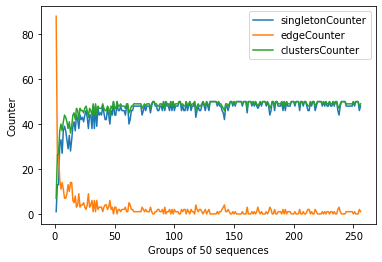

In [9]:
plt.plot(x, singletonCounter, label = "singletonCounter")
plt.plot(x, edgeCounter, label = "edgeCounter")
plt.plot(x, clustersCounter, label = "clustersCounter")
plt.xlabel("Groups of 50 sequences")
plt.ylabel("Counter")
#plt.plot(x, publicness, label = "publicness")
plt.legend()
plt.show()